In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [31]:
anemia_df = pd.read_csv("anemia.csv")
anemia_df.head()

# Here in Gender: 0 - male, 1-  female
#      Result: 0- not anemic, 1-anemic


,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [32]:
# To print the total number of rows and columns
shape = anemia_df.shape
print(f"Total number of rows: {shape[0]}")
print(f"Total number of columns: {shape[1]}")

Total number of rows: 1421
Total number of columns: 6


In [33]:
#checking the data types
print(anemia_df.dtypes)

Gender          int64
Hemoglobin    float64
MCH           float64
MCHC          float64
MCV           float64
Result          int64
dtype: object


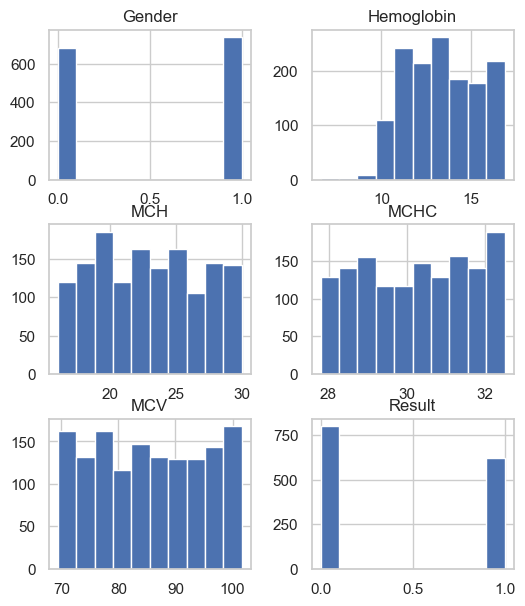

In [34]:
# Histograms for all columns(numeric data)
sns.set(style="whitegrid")
anemia_df.hist(bins=10, figsize=(6, 7))
plt.show()

In [35]:
#for getting the count of nan values in each column
total_nans = anemia_df.isna().sum()
print(total_nans)  #They are no nan values

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64


In [36]:
# Checking for duplicates
duplicates = anemia_df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 887


In [37]:
#Removing duplicate rows
data_cleaned = anemia_df.drop_duplicates()
print("After removing duplicates:", data_cleaned.shape)

After removing duplicates: (534, 6)


In [38]:
print( data_cleaned.describe())

           Gender  Hemoglobin         MCH        MCHC         MCV      Result
count  534.000000  534.000000  534.000000  534.000000  534.000000  534.000000
mean     0.522472   13.287079   22.911985   30.249438   85.647004    0.462547
std      0.499963    2.066276    3.948482    1.412312    9.604934    0.499063
min      0.000000    6.600000   16.000000   27.800000   69.400000    0.000000
25%      0.000000   11.600000   19.500000   29.000000   77.325000    0.000000
50%      1.000000   13.100000   22.750000   30.400000   85.450000    0.000000
75%      1.000000   14.975000   26.100000   31.475000   94.150000    1.000000
max      1.000000   16.900000   30.000000   32.500000  101.600000    1.000000


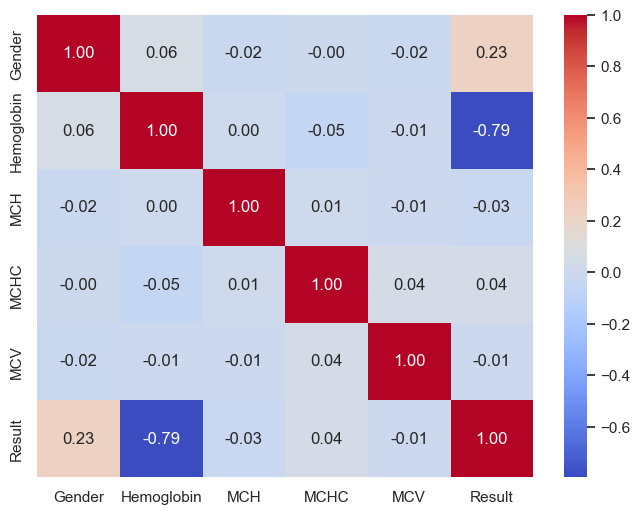

In [39]:
# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(data_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


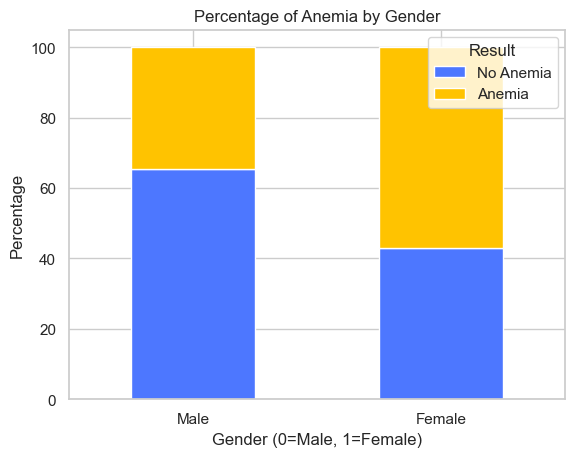

In [40]:
#Distribution of Anemia Across Gender
proportion_data = data_cleaned.pivot_table(index='Gender', columns='Result', aggfunc='size', fill_value=0)
proportion_data = proportion_data.div(proportion_data.sum(axis=1), axis=0) * 100 
proportion_data.plot(kind='bar', stacked=True, color=['#4D77FF', '#FFC300'])
plt.title('Percentage of Anemia by Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.legend(title='Result', labels=['No Anemia', 'Anemia'])
plt.show()
#From this we can say that most of females are anemic

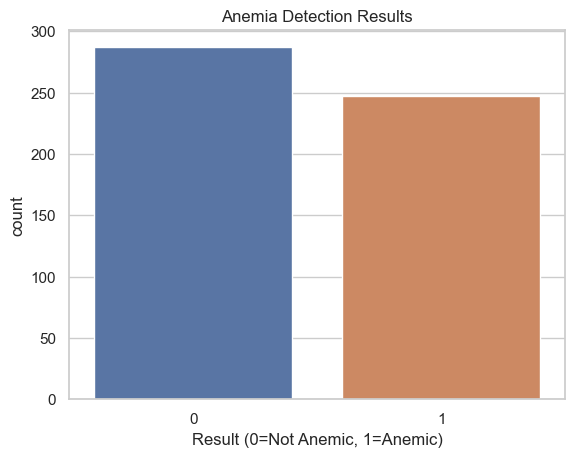

In [41]:
#Distribution of Anemia Detection Results
sns.countplot(x='Result', data=data_cleaned)
plt.title('Anemia Detection Results')
plt.xlabel('Result (0=Not Anemic, 1=Anemic)')
plt.show()


In [42]:
#Feature enginering
data_cleaned['MCV_MCH_Interaction'] = data_cleaned['MCV'] * data_cleaned['MCH']
data_cleaned['Log_MCHC'] = np.log(data_cleaned['MCHC'] + 1) 

features = ['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'MCV_MCH_Interaction', 'Log_MCHC']
scaler = StandardScaler()
data_cleaned.loc[:, features] = scaler.fit_transform(data_cleaned[features])

C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\4251051887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['MCV_MCH_Interaction'] = data_cleaned['MCV'] * data_cleaned['MCH']
C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\4251051887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Log_MCHC'] = np.log(data_cleaned['MCHC'] + 1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_12884\4251051887.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [43]:
#training
X = data_cleaned[features]
y = data_cleaned['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
#logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        86
           1       0.94      1.00      0.97        75

    accuracy                           0.97       161
   macro avg       0.97      0.97      0.97       161
weighted avg       0.97      0.97      0.97       161



In [16]:
# Rfc model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        86
           1       0.99      1.00      0.99        75

    accuracy                           0.99       161
   macro avg       0.99      0.99      0.99       161
weighted avg       0.99      0.99      0.99       161



In [45]:
#Decoision
dt_model = DecisionTreeClassifier(max_depth=2,random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        86
           1       0.80      1.00      0.89        75

    accuracy                           0.88       161
   macro avg       0.90      0.89      0.88       161
weighted avg       0.91      0.88      0.88       161



In [46]:
#Since rfc model as better accuracy we are generating the pkl file with rfc model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [64]:
#preprocess function which does all the preprocessing steps
def preprocess_data(df):
    df = df.drop_duplicates()
    df['MCV_MCH_Interaction'] = df['MCV'] * df['MCH']
    df['Log_MCHC'] = np.log(df['MCHC'] + 1)  # Adding 1 to avoid taking log(0)

    features = ['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'MCV_MCH_Interaction', 'Log_MCHC']
    scaler = StandardScaler()
    df[features] = scaler.fit_transform(df[features])
    return df

# Loading the best model from the pickle file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf = pickle.load(file)

#input
config = pd.DataFrame({
     "Gender": [0],
    "Hemoglobin": [9.0],
    "MCH": [21.5],
    "MCHC": [29.6],
    "MCV": [71.2]              

                 
})

processed_df = preprocess_data(config)
loaded_pred_rf = loaded_rf.predict(processed_df)
print("Predicted class:", loaded_pred_rf)


Predicted class: [1]


In [65]:
#Input dict
config = {
    "Gender": 0,
    "Hemoglobin": 9.0,
    "MCH": 21.5,
    "MCHC": 29.6,
    "MCV": 71.2,              
}


In [66]:
#request with input data for flask api
import requests
url = "http://localhost:9696/predict"
r = requests.post(url, json = config)
r.text.strip()

'{\n  "rfc_prediction": [\n    1\n  ]\n}'